In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import violinbox_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task**: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). **Hint**: Make sure that the order of vehicle classes makes sense in your plot!

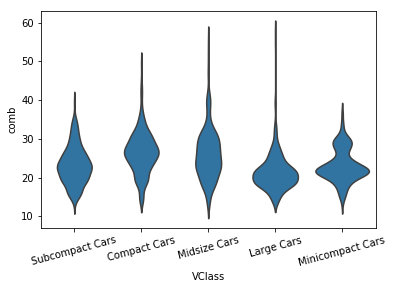

In [3]:
# YOUR CODE HERE
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x="VClass", y = "comb",
             color = base_color, inner = None);
plt.xticks(rotation = 15);

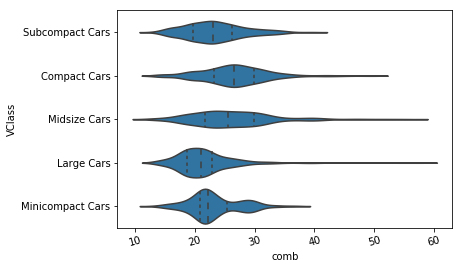

In [10]:
# run this cell to check your work against ours
# YOUR CODE HERE
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ,  x= "comb",y="VClass",
             color = base_color, inner = "quartile");
plt.xticks(rotation = 15);

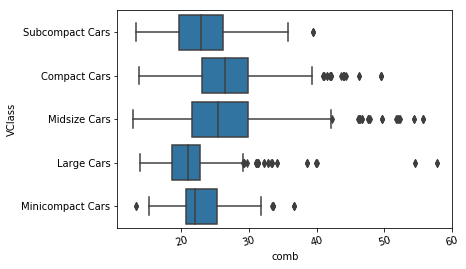

In [6]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = "comb", y= "VClass",
             color = base_color);
plt.xticks(rotation = 15);

(6.9664703193558157, 63.093219452426048)

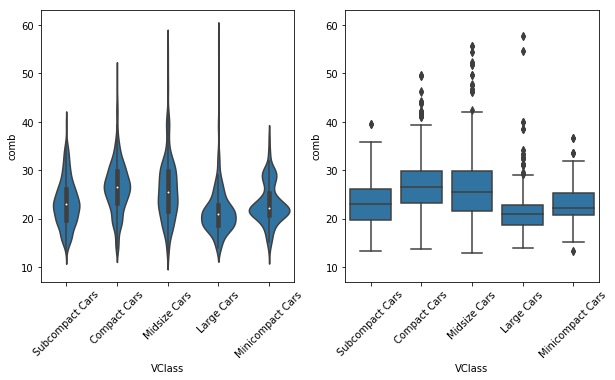

In [8]:
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)
ax1 = sb.violinplot(data = fuel_econ, y = "comb", x="VClass",color = base_color)
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sb.boxplot(data=fuel_econ, y = "comb", x="VClass",color = base_color)
plt.xticks(rotation=45);
plt.ylim(ax1.get_ylim()) # set y_axis limits to be same

### Clustered Bar Charts

In [11]:
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


In [16]:
fuel_econ["trans_type"]=fuel_econ["trans"].apply(lambda x:x.split()[0])
ct_counts = fuel_econ.groupby(["VClass","trans_type"]).size()
ct_counts = ct_counts.reset_index(name="count")
ct_counts.pivot(index="VClass",columns="trans_type", values="count")
#sb.heatmap(ct_counts);

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


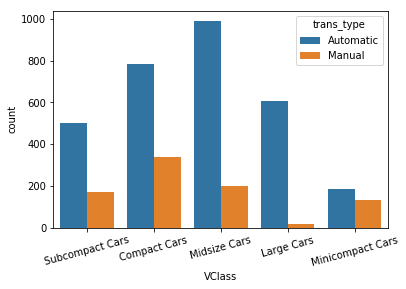

In [19]:
sb.countplot(data = fuel_econ, x="VClass", hue="trans_type")
plt.xticks(rotation=15);

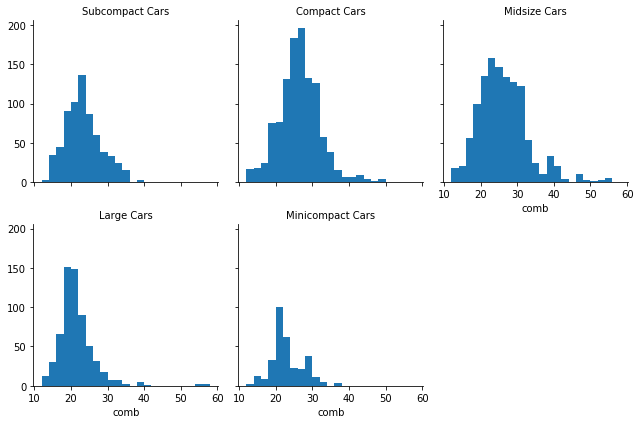

In [24]:
bins = np.arange(12, 58+2,2)
g = sb.FacetGrid(data = fuel_econ, col="VClass",col_wrap =3);
g.map(plt.hist, "comb", bins=bins);
g.set_titles("{col_name}");